Number of nodes: 1000
Number of edges: 2991
Average degree: 5.98


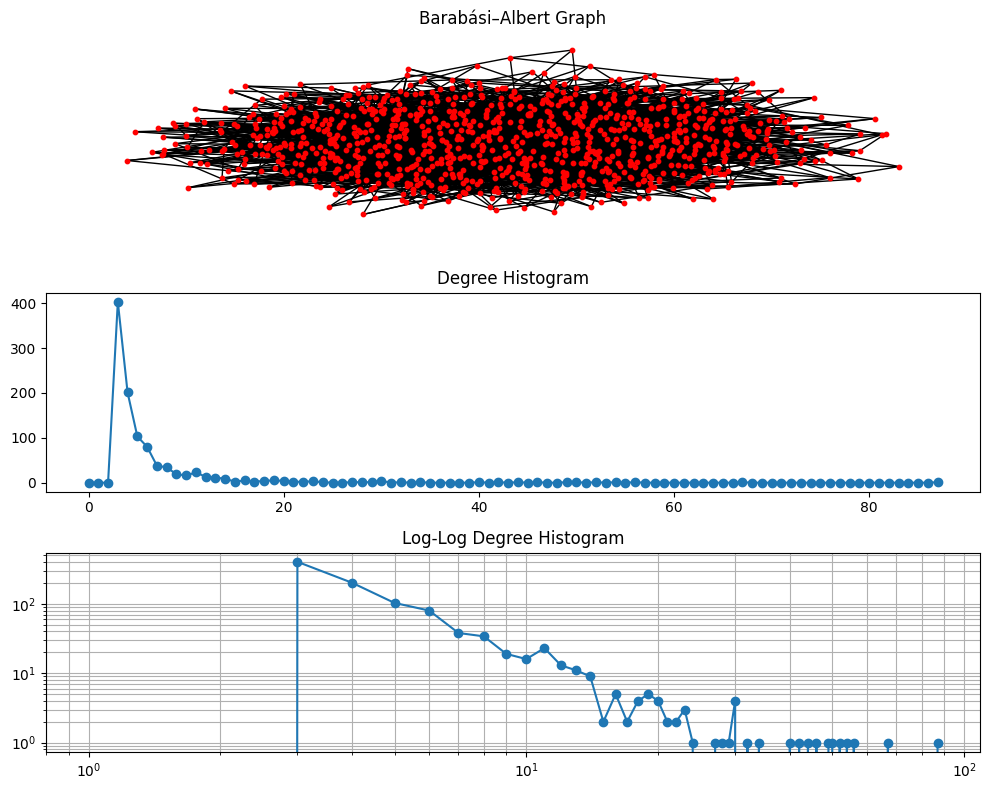

Before log:
     degree  number
3        3     403
4        4     201
5        5     103
6        6      80
7        7      38
8        8      34
9        9      19
10      10      16
11      11      23
12      12      13
13      13      11
14      14       9
15      15       2
16      16       5
17      17       2
18      18       4
19      19       5
20      20       4
21      21       2
22      22       2
23      23       3
24      24       1
27      27       1
28      28       1
29      29       1
30      30       4
32      32       1
34      34       1
40      40       1
42      42       1
44      44       1
46      46       1
49      49       1
50      50       1
52      52       1
54      54       1
56      56       1
67      67       1
87      87       1
After log:
       degree    number
3   1.098612  5.998937
4   1.386294  5.303305
5   1.609438  4.634729
6   1.791759  4.382027
7   1.945910  3.637586
8   2.079442  3.526361
9   2.197225  2.944439
10  2.302585  2.772589
11  2.39

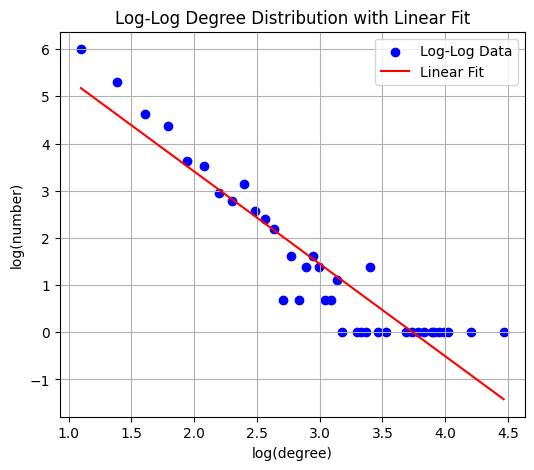

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# グラフ生成
ba = nx.barabasi_albert_graph(1000, 3)

# グラフ描画
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
nx.draw(ba, node_size=10, node_color='red')
plt.title("Barabási–Albert Graph")

# グラフ情報の表示
print(f"Number of nodes: {ba.number_of_nodes()}")
print(f"Number of edges: {ba.number_of_edges()}")
print(f"Average degree: {sum(dict(ba.degree()).values()) / ba.number_of_nodes():.2f}")

# 度数分布の取得
degree_hist = nx.degree_histogram(ba)

# 度数分布の描画
plt.subplot(3, 1, 2)
plt.plot(degree_hist, marker='o')
plt.title("Degree Histogram")

# 対数スケールでの度数分布
plt.subplot(3, 1, 3)
plt.xscale("log")
plt.yscale("log")
plt.grid(which="both")
plt.plot(degree_hist, marker='o')
plt.title("Log-Log Degree Histogram")

plt.tight_layout()
plt.show()

# DataFrame化
list_a = list(range(len(degree_hist)))
df = pd.DataFrame({'degree': list_a, 'number': degree_hist})

# 0除去（logのため）
databeforelog = df[df['number'] != 0]
print("Before log:\n", databeforelog)

# 対数変換
dataafterlog = np.log(databeforelog)
print("After log:\n", dataafterlog)

# 散布図と回帰直線
plt.figure(figsize=(6, 5))
plt.scatter(dataafterlog['degree'], dataafterlog['number'], color='blue', label='Log-Log Data')

# 線形回帰
mod = LinearRegression(fit_intercept=True)
mod.fit(dataafterlog[['degree']], dataafterlog[['number']])

slope = mod.coef_[0, 0]
intercept = mod.intercept_[0]
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

# 回帰直線の描画
x = np.linspace(dataafterlog['degree'].min(), dataafterlog['degree'].max(), 100)
y = slope * x + intercept
plt.plot(x, y, color='red', label='Linear Fit')

plt.xlabel("log(degree)")
plt.ylabel("log(number)")
plt.title("Log-Log Degree Distribution with Linear Fit")
plt.legend()
plt.grid(True)
plt.show()
